In [6]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [7]:
N = 64
p = 3

sim = AdvectionSolver(
    ic=lambda idx, x, y, z: ic.square(idx, x, y, z, vx=2, vy=1),
    nx=N,
    ny=N,
    p=p,
    interpolation_scheme="gauss-legendre",
    cupy=True,
    log_every_step=False,
)

/Users/jonathan/Desktop/superfv/superfv/finite_volume_solver.py:294: UserWarning: CuPy is not available. Using NumPy instead.
  warnings.warn("CuPy is not available. Using NumPy instead.")


In [8]:
sim.run(n=5)

100%|██████████| 5/5 [00:00<00:00,  9.81it/s]


In [9]:
n_cells_updated_per_s = (
    np.array(sim.minisnapshots["n_updates"])[1:]
    / np.array(sim.minisnapshots["run_time"])[1:]
)

for i in range(len(n_cells_updated_per_s)):
    print(f"Step {i+1}: {n_cells_updated_per_s[i]:.2e} cells updated per second")

Step 1: 9.74e+04 cells updated per second
Step 2: 1.92e+05 cells updated per second
Step 3: 1.97e+05 cells updated per second
Step 4: 1.91e+05 cells updated per second
Step 5: 1.95e+05 cells updated per second


/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Coordinate 0.5 not found in array. Using nearest: 0.4921875.
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Coordinate 0.5 not found in array. Using nearest: 0.4921875.
  warnings.warn(


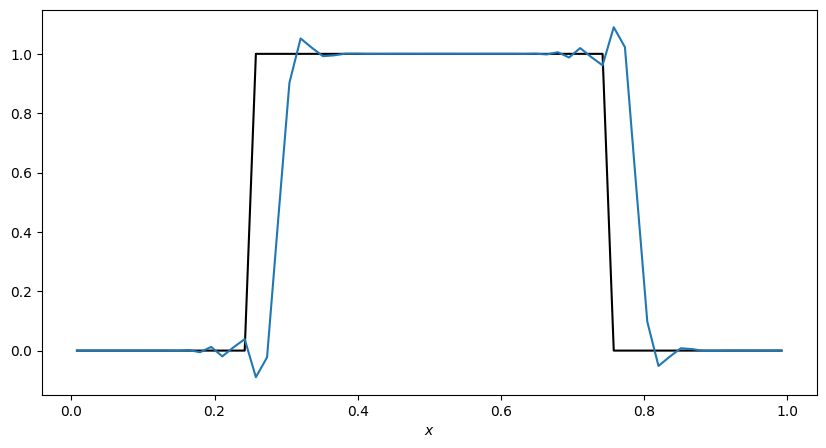

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, x=None, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, x=None, xlabel=True)